Magnetometer measurements were taken of the MINOS shaft to try to determine if there is a specific direction that would be preferable for penetraions through the magnetic shielding. During measurments magentometer, accelerometer, barometer, and gyro values were recorded using Phyphox. Magnetometer readings can be graphed as a function of atmospheric pressure to get a rough estimate of magnetometer values as a function of shaft height.

Pictures of the magnetomter fixutre showing the magnetometer axes can be found in the folders for each run.

After measurement recording started on the phone several tasks had to be completed before the fixture was lowered down the shaft. When the fixture reached the bottom of the shaft there was a brief pause to communicate with the team underground. Once the fixture reached the top of the shaft a number of tasks were done before measurement was stopped. If barometric pressure is graphed with respect to time the timestamps for start of run, end of run, and arrival at the bottom of the shaft can be estimated to filter the data. Periods of unchanigng barometric pressure represent times when the fixture was not moving.

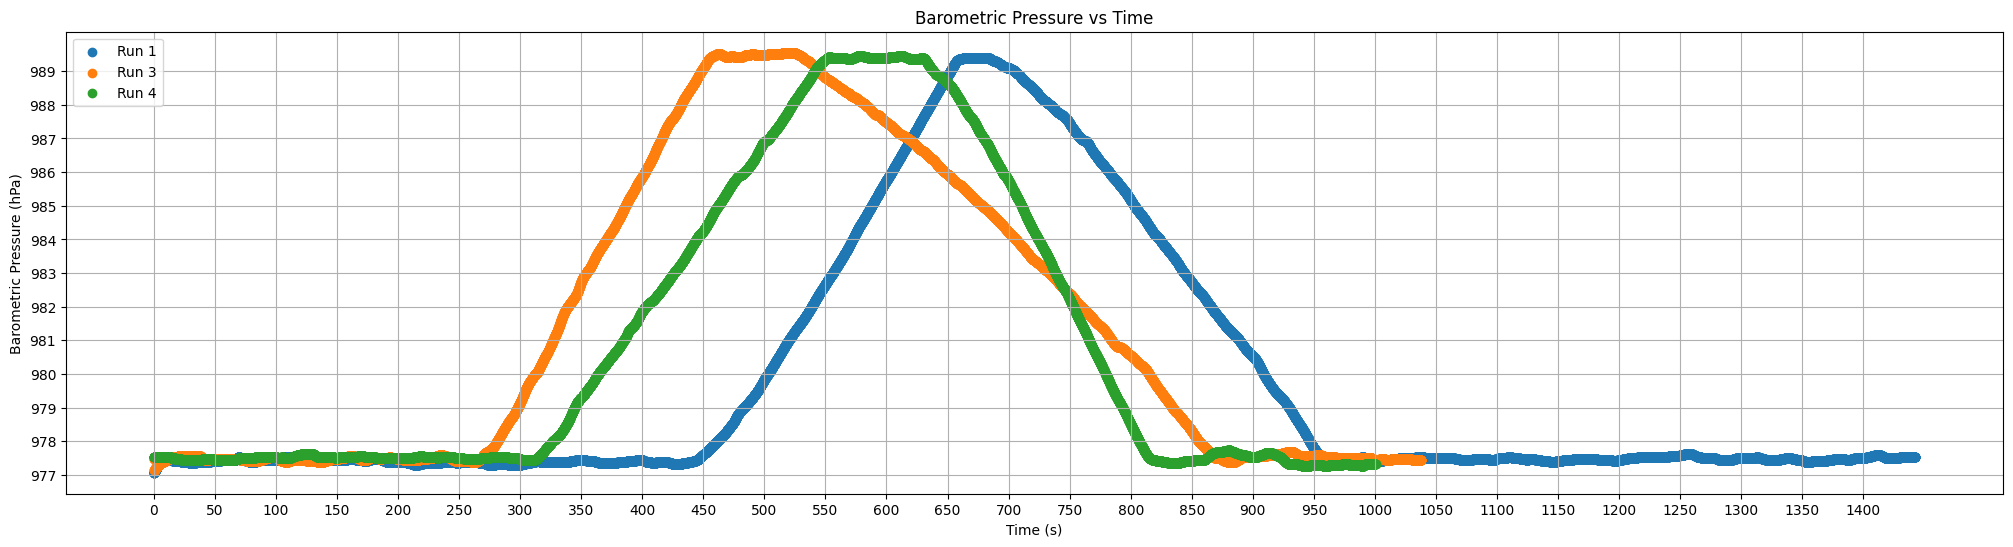

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#import data from csv files
r1p_v_t = pd.read_csv('Run 1/Run 1 Raw CSV Data/Pressure.csv')
r1mag_v_t = pd.read_csv('Run 1/Run 1 Raw CSV Data/Magnetometer.csv')

r3p_v_t = pd.read_csv('Run 3/Run 3 Raw CSV Data/Pressure.csv')
r3mag_v_t = pd.read_csv('Run 3/Run 3 Raw CSV Data/Magnetometer.csv')

r4p_v_t = pd.read_csv('Run 4/Run 4 Raw CSV Data/Pressure.csv')
r4mag_v_t = pd.read_csv('Run 4/Run 4 Raw CSV Data/Magnetometer.csv')

#combine time, pressure, and magnetometer data into a single dataframe for each run
r1magx = r1mag_v_t['Magnetic field x (µT)'].reset_index(drop=True)
r1magy = r1mag_v_t['Magnetic field y (µT)'].reset_index(drop=True)
r1magz = r1mag_v_t['Magnetic field z (µT)'].reset_index(drop=True)
run1 = pd.concat([r1p_v_t.reset_index(drop=True), r1magx, r1magy, r1magz], axis=1)

r3magx = r3mag_v_t['Magnetic field x (µT)'].reset_index(drop=True)
r3magy = r3mag_v_t['Magnetic field y (µT)'].reset_index(drop=True)
r3magz = r3mag_v_t['Magnetic field z (µT)'].reset_index(drop=True)
run3 = pd.concat([r3p_v_t.reset_index(drop=True), r3magx, r3magy, r3magz], axis=1)

r4magx = r4mag_v_t['Magnetic field x (µT)'].reset_index(drop=True)
r4magy = r4mag_v_t['Magnetic field y (µT)'].reset_index(drop=True)
r4magz = r4mag_v_t['Magnetic field z (µT)'].reset_index(drop=True)
run4 = pd.concat([r4p_v_t.reset_index(drop=True), r4magx, r4magy, r4magz], axis=1)


#Plot magnetometer readings against barometric pressure
pticks = np.arange(round(min(run1['Pressure (hPa)'])), round(max(run1['Pressure (hPa)'])+1), 1)
timeticks = np.arange(0, max([run1['Time (s)'].max(), run3['Time (s)'].max(), run4['Time (s)'].max()])+1, 50)

figs = plt.figure();
figs.set_size_inches(25,6)
pvt_plot = figs.add_subplot(111)

pvt_plot.scatter(x=run1['Time (s)'], y=run1['Pressure (hPa)'], c='tab:blue', marker="o", label='Run 1')
pvt_plot.scatter(x=run3['Time (s)'], y=run3['Pressure (hPa)'], c='tab:orange', marker="o", label='Run 3')
pvt_plot.scatter(x=run4['Time (s)'], y=run4['Pressure (hPa)'], c='tab:green', marker="o", label='Run 4')

plt.title("Barometric Pressure vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Barometric Pressure (hPa)")
plt.xticks(timeticks);
plt.yticks(pticks);
plt.grid()
plt.legend(loc='upper left');

In [2]:
r1t1 = 425  # Approximate measurement run start time
r1t2 = 675  # Approximate time at which the fixture reached the bottom of the shaft
r1t3 = 975  # Approximate measurement run stop time

r3t1 = 250  # Approximate measurement run start time
r3t2 = 475  # Approximate time at which the fixture reached the bottom of the shaft
r3t3 = 900  # Approximate measurement run stop time

r4t1 = 300  # Approximate measurement run start time
r4t2 = 575  # Approximate time at which the fixture reached the bottom of the shaft
r4t3 = 825  # Approximate measurement run stop time

After Filtering the data magnetometer readings, the downward measurement runs are plotted against pressure.

Upwards and downwards measurment run graphs for magnetometer Y and Z values are plotted side by side. From the comparison graphs it can be observed that the magnetometer measurements are relatively consistent, but atmospheric pressure readings drift with time. The changes in atmospheric pressure shift and stretch the graph slighly along the vertical axis, but the values of the graph along the horizontal axis are very consistent between up and down runs.

Note that at minimum pressure some datasets show a cluster of very high magnetic readings. Just before each run began a magnet was placed against the back of the fixture case for 5 seconds to provide a reference value and to aid in filtering the data. The same procedure was done at the end of a measurement run. If magnetomter data is plotted with respect to time this would show up as large readings at the beginning of a run (t1) and at the end of a run (t3).



------------------- Run 1 -------------------


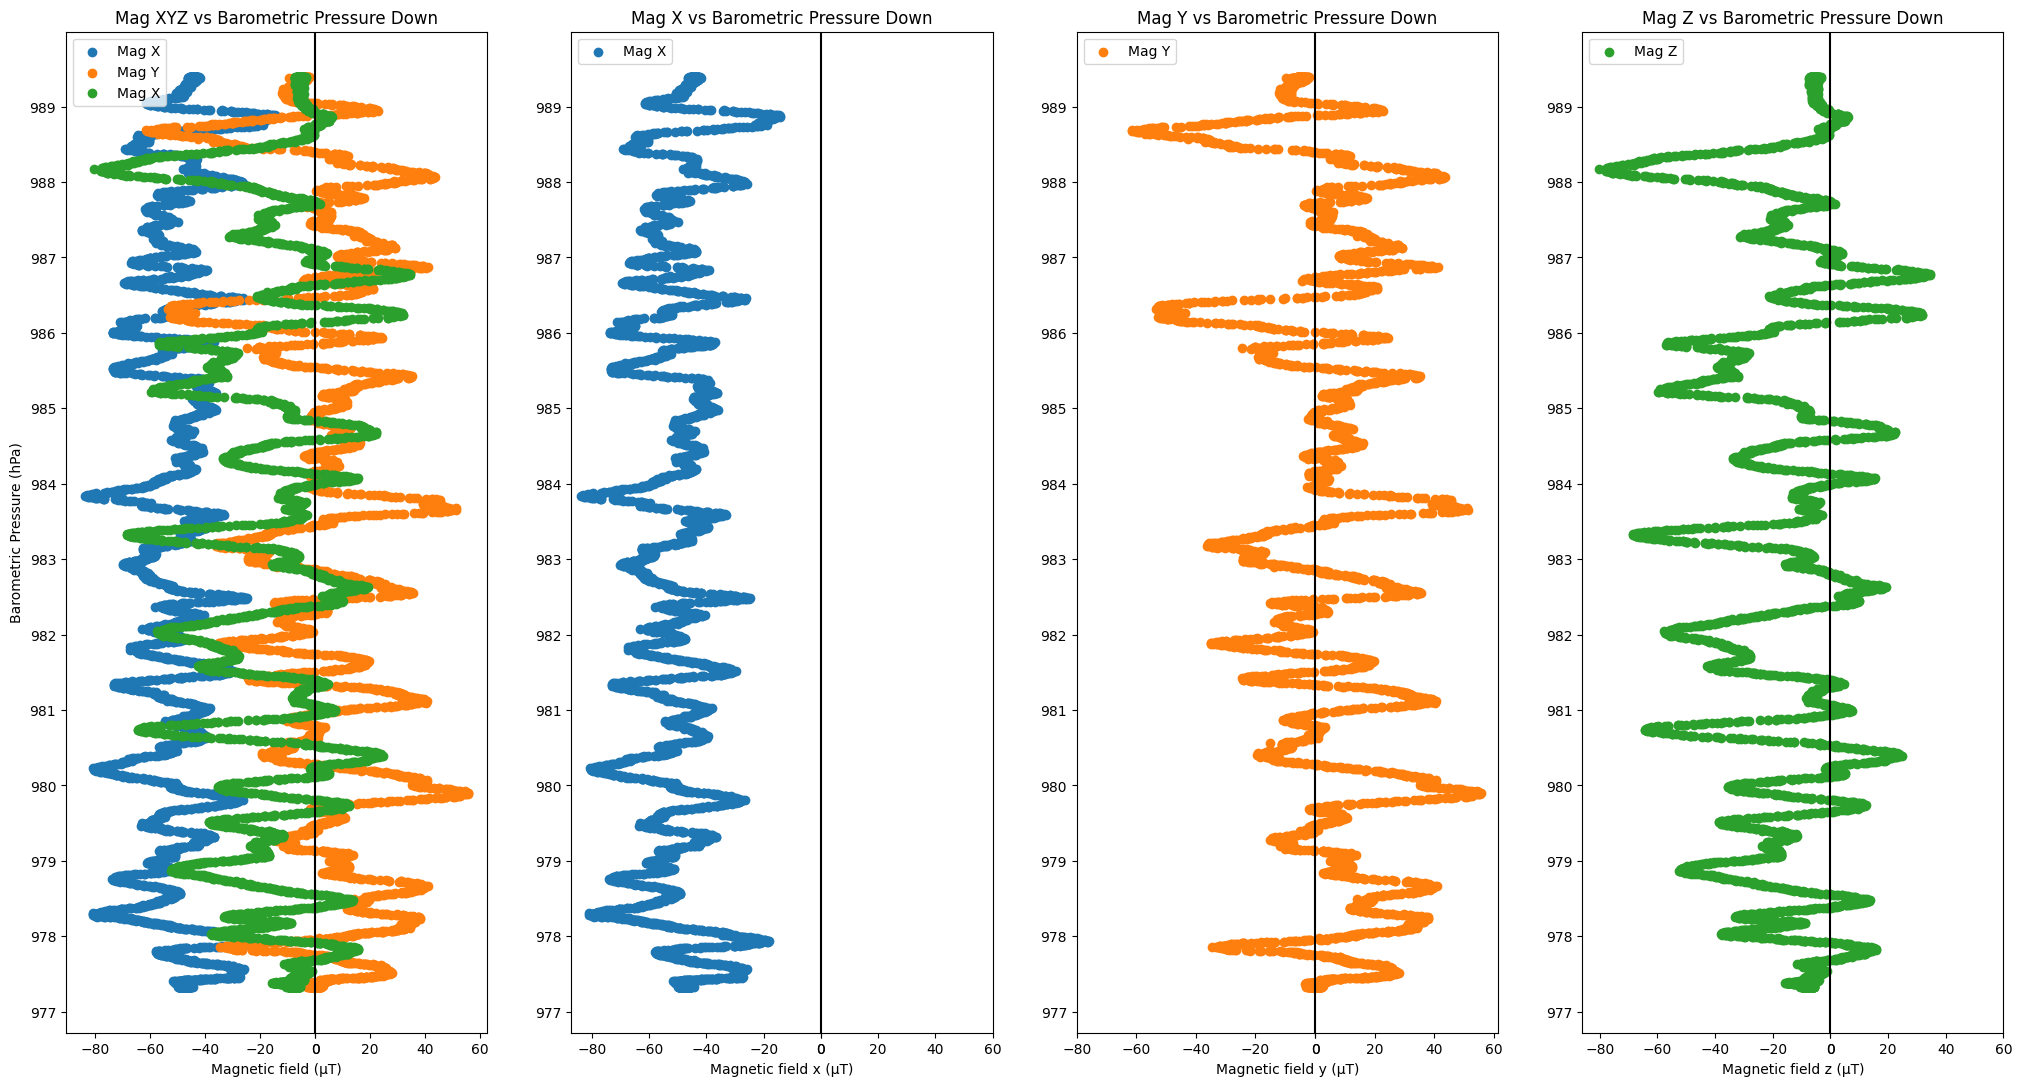

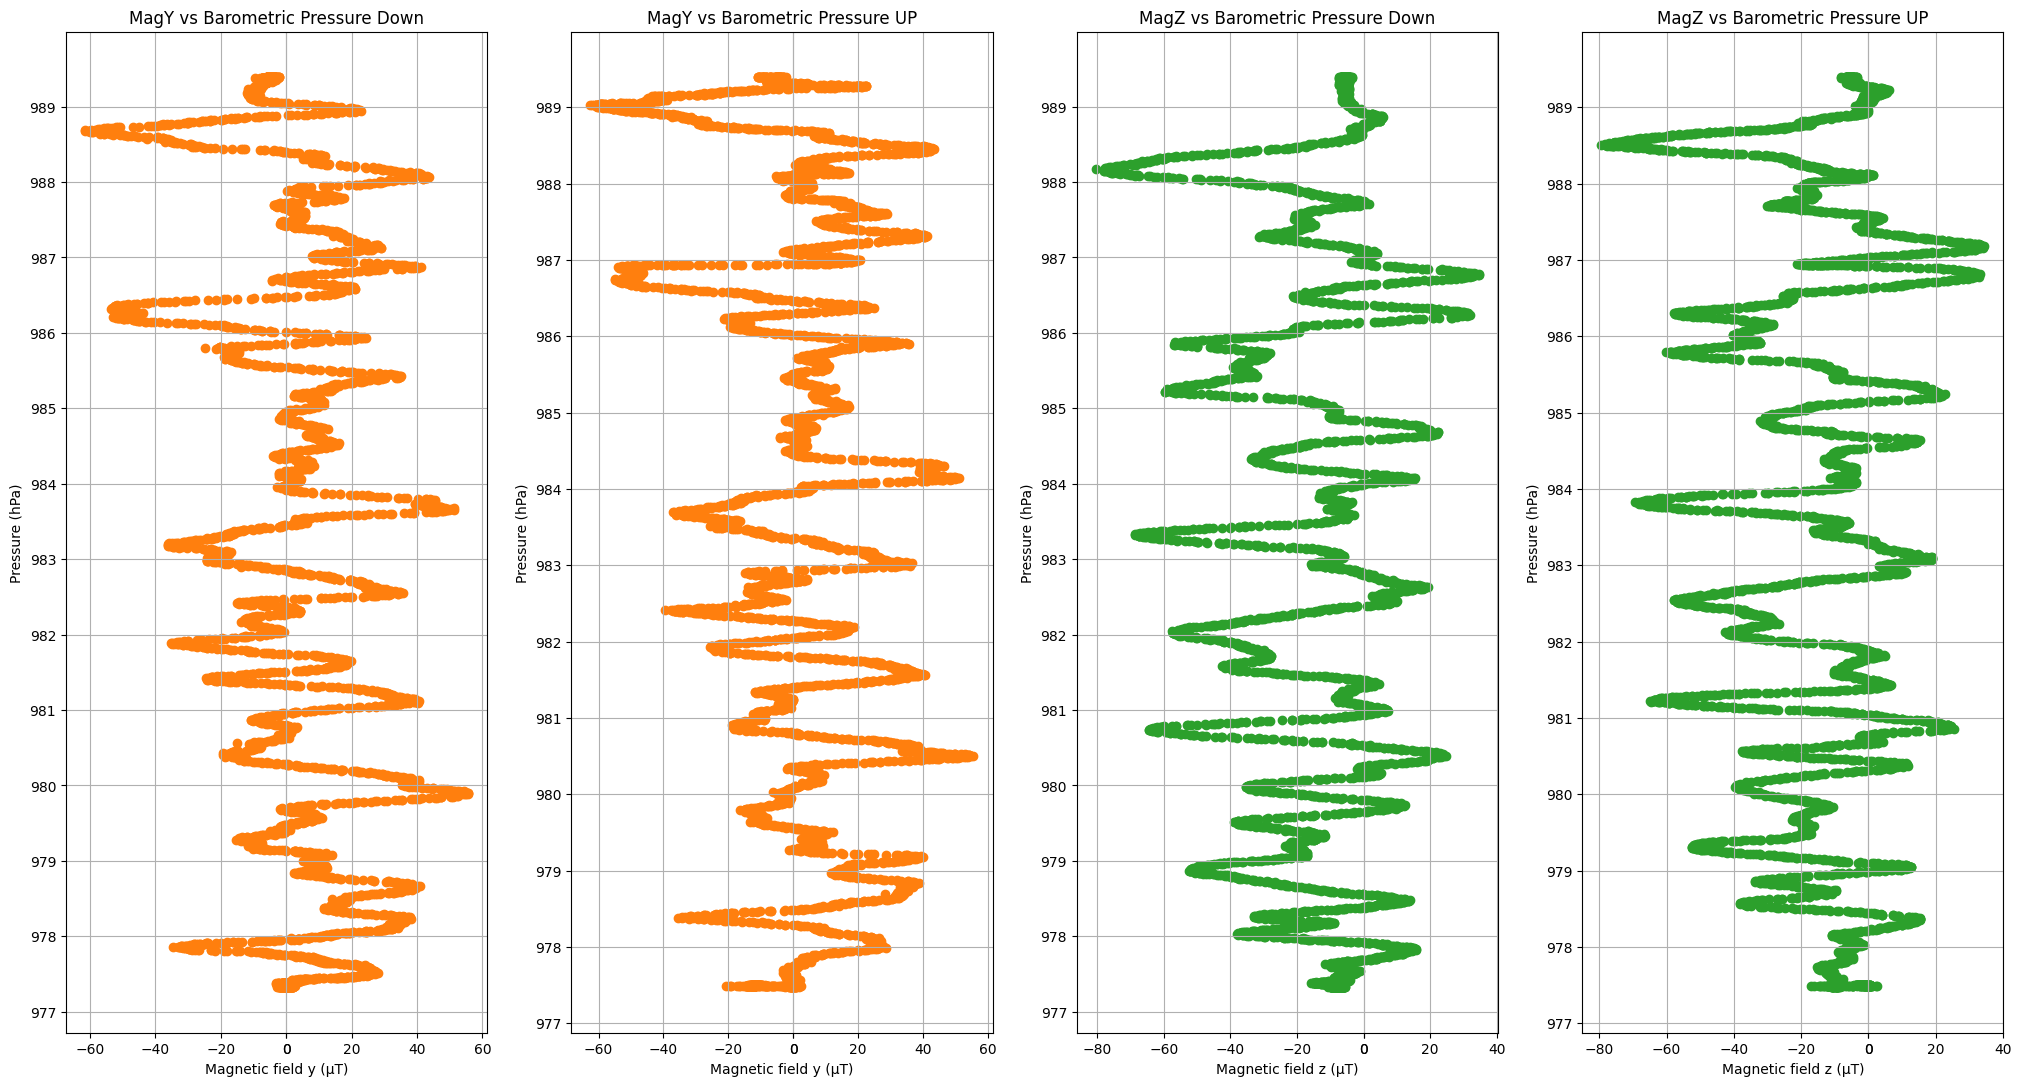

In [3]:

#filter and split dataframe into down and up measurement run data
def trimbytime(rundf, start, bottom, stop):
    
    rundown = rundf[rundf['Time (s)'].between(start, bottom)]
    runup = rundf[rundf['Time (s)'].between(bottom, stop)]
    return[rundown, runup]

#Graph magnetometer readings versus barometric pressure
def p_v_mag_graphs(plotname, rundown, runup):

    print()
    print()
    print(f"------------------- {plotname} -------------------")
    
    magticks = np.arange(round(rundown[['Magnetic field x (µT)', 'Magnetic field y (µT)', 'Magnetic field z (µT)']].min().min()/10)*10, (round(rundown[['Magnetic field x (µT)', 'Magnetic field y (µT)', 'Magnetic field z (µT)']].max().max())/10+1)*10, 20.0)
    magticks = np.sort(np.append(magticks,[0]))
    pticks = np.arange(round(min(run1['Pressure (hPa)'])), round(max(run1['Pressure (hPa)'])+1), 1)

    fig = plt.figure();
    fig.set_size_inches(25,13);

    #Plot all magnetometer axes against pressure for the downward leg of the journey on one plot------------------------------------
    magxyz = fig.add_subplot(141)
    magxyz.scatter(x=rundown['Magnetic field x (µT)'], y=rundown['Pressure (hPa)'], c='tab:blue', marker="o", label='Mag X')
    magxyz.scatter(x=rundown['Magnetic field y (µT)'], y=rundown['Pressure (hPa)'], c='tab:orange', marker="o", label='Mag Y')
    magxyz.scatter(x=rundown['Magnetic field z (µT)'], y=rundown['Pressure (hPa)'], c='tab:green', marker="o", label='Mag X')
    plt.legend(loc='upper left')
    plt.title("Mag XYZ vs Barometric Pressure Down")
    plt.xlabel('Magnetic field (µT)')
    plt.ylabel("Barometric Pressure (hPa)")
    plt.xticks(magticks)
    plt.yticks(pticks)
    plt.axvline(0, color='black')

    
    #Plot just X, Y and Z  for the downward leg of the journey------------------------------------------------------------------
    magx = fig.add_subplot(142)
    magx.scatter(x=rundown['Magnetic field x (µT)'], y=rundown['Pressure (hPa)'], c='tab:blue', marker="o", label='Mag X')
    plt.xticks(magticks)
    plt.yticks(pticks)
    plt.title("Mag X vs Barometric Pressure Down")
    plt.xlabel('Magnetic field x (µT)')
    plt.axvline(0, color='black')
    plt.legend(loc='upper left')
    
    magy = fig.add_subplot(143)
    magy.scatter(x=rundown['Magnetic field y (µT)'], y=rundown['Pressure (hPa)'], c='tab:orange', marker="o", label='Mag Y')
    plt.xticks(magticks)
    plt.yticks(pticks)
    plt.title("Mag Y vs Barometric Pressure Down")
    plt.xlabel('Magnetic field y (µT)')
    plt.axvline(0, color='black')
    plt.legend(loc='upper left')
    
    magy = fig.add_subplot(144)
    magz_plot = plt.scatter(x=rundown['Magnetic field z (µT)'], y=rundown['Pressure (hPa)'], c='tab:green', marker="o", label='Mag Z')
    plt.xticks(magticks)
    plt.yticks(pticks)
    plt.title("Mag Z vs Barometric Pressure Down")
    plt.xlabel('Magnetic field z (µT)')
    plt.axvline(0, color='black')
    plt.legend(loc='upper left')
     
    

    plt.figure(figsize=(25,13))
    #Plot Y mag values side by side for up and down------------------------------------------------------------------------------------------------------
    magyticks = np.arange(round(rundown['Magnetic field y (µT)'].min().min()/10)*10, (round(rundown['Magnetic field y (µT)'].max().max())/10+1)*10, 20.0)
    magyticks = np.sort(np.append(magyticks,[0]))
    
    plt.subplot(1, 4, 1)
    r1mvp_down_plot = plt.scatter(x=rundown['Magnetic field y (µT)'], y=rundown['Pressure (hPa)'], c='tab:orange')
    plt.title("MagY vs Barometric Pressure Down")
    plt.xlabel('Magnetic field y (µT)')
    plt.ylabel("Pressure (hPa)")
    plt.xticks(magyticks);
    plt.yticks(pticks);
    plt.grid()
    
    plt.subplot(1, 4, 2)
    r1mvp_up_plot = plt.scatter(x=runup['Magnetic field y (µT)'], y=runup['Pressure (hPa)'], c='tab:orange')
    plt.title("MagY vs Barometric Pressure UP")
    plt.xlabel('Magnetic field y (µT)')
    plt.ylabel("Pressure (hPa)")
    plt.xticks(magyticks);
    plt.yticks(pticks);
    plt.grid()

    #Plot Z mag values side by side for up and down---------------------------------------------------------------------------------------------------------
    magzticks = np.arange(round(rundown['Magnetic field z (µT)'].min().min()/10)*10, (round(rundown['Magnetic field z (µT)'].max().max())/10+1)*10, 20.0)
    magzticks = np.sort(np.append(magzticks,[0]))
    

    plt.subplot(1, 4, 3)
    r1mvp_down_plot = plt.scatter(x=rundown['Magnetic field z (µT)'], y=rundown['Pressure (hPa)'], c='tab:green')
    plt.title("MagZ vs Barometric Pressure Down")
    plt.xlabel('Magnetic field z (µT)')
    plt.ylabel("Pressure (hPa)")
    plt.xticks(magzticks);
    plt.yticks(pticks);
    plt.grid()
    
    plt.subplot(1, 4, 4)
    r1mvp_up_plot = plt.scatter(x=runup['Magnetic field z (µT)'], y=runup['Pressure (hPa)'], c='tab:green')
    plt.title("MagZ vs Barometric Pressure UP")
    plt.xlabel('Magnetic field z (µT)')
    plt.ylabel("Pressure (hPa)")
    plt.xticks(magzticks);
    plt.yticks(pticks);
    plt.grid()


[r1down, r1up] = trimbytime(run1, r1t1, r1t2, r1t3)
[r3down, r3up] = trimbytime(run3, r3t1, r3t2, r3t3)
[r4down, r4up] = trimbytime(run4, r4t1, r4t2, r4t3)


p_v_mag_graphs("Run 1",r1down, r1up)
#p_v_mag_graphs("Run 3",r3down, r3up)
#p_v_mag_graphs("Run 4",r4down, r4up)



Each of the 3 runs was done with the phone at a different orientation to determine if the measurement fixture hardware contributed significantly to readings. While the fixture was designed to minimize magnetic components, the stainless steel spring elements of the snap latches are slightly magnetic.

Relative to run 1, the phone was rotated 180 degrees about the magnetomter Z axis for run 3, and then rotated 45 degrees about the y axis for run 4. Applying the 45 degree rotation fro run 4 did require adding an adapter to the fixture that shifted the positoin of the magnetomer on the order of one inch.

By applying a rotation transformation to the magnetometer data of runs 3 and 4 we can plot and comapre the data relative to run 1.

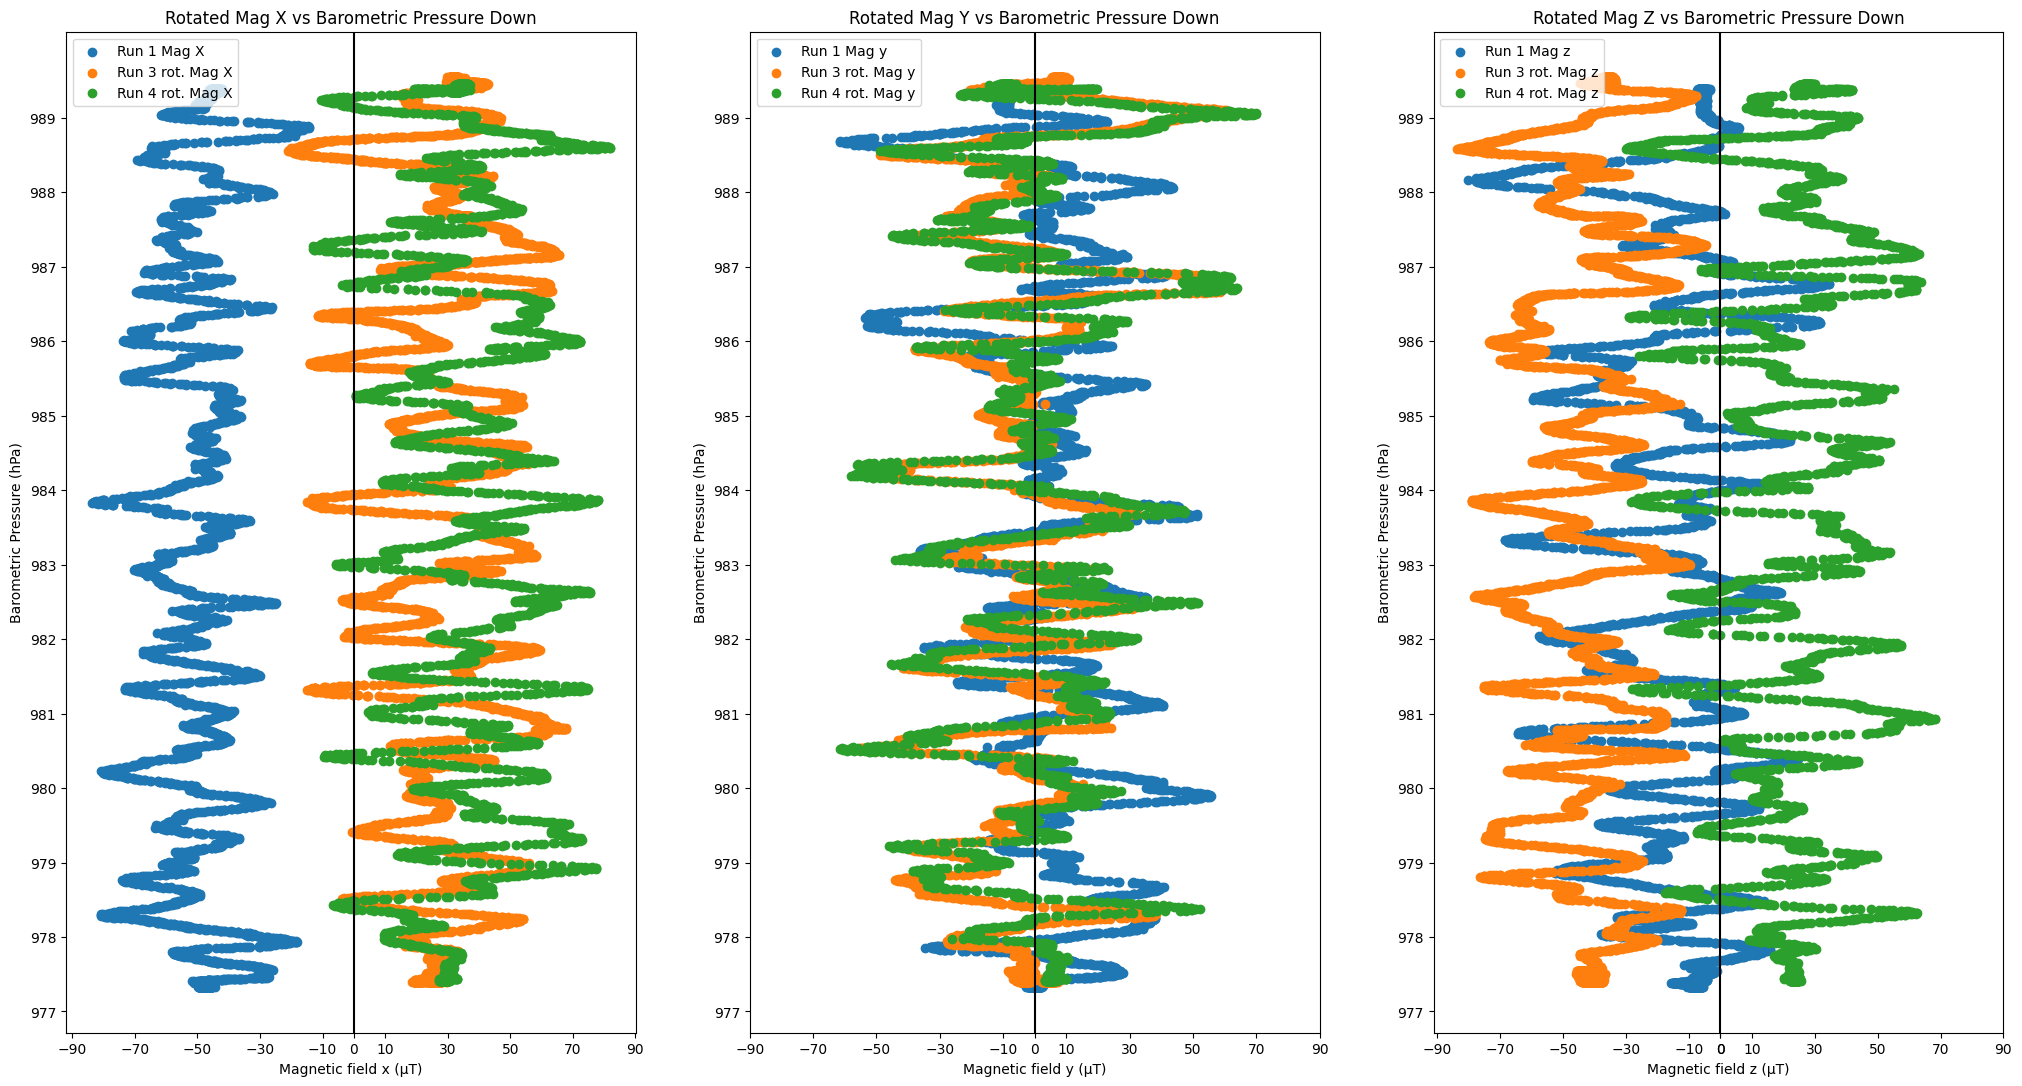

In [4]:
import math as m


#X axis rotation matrix
def Rx(theta):
  return np.matrix([[ 1, 0           , 0           ],
                   [ 0, m.cos(theta),-m.sin(theta)],
                   [ 0, m.sin(theta), m.cos(theta)]])

#Y axis rotation matrix
def Ry(theta):
  return np.matrix([[ m.cos(theta), 0, m.sin(theta)],
                   [ 0           , 1, 0           ],
                   [-m.sin(theta), 0, m.cos(theta)]])

#Z axis rotation matrix
def Rz(theta):
  return np.matrix([[ m.cos(theta), -m.sin(theta), 0 ],
                   [ m.sin(theta), m.cos(theta) , 0 ],
                   [ 0           , 0            , 1 ]])


#Rotate the magnetometer data and append the rotated data to the measurement run dataframe
def addrot(xrot, yrot, zrot, rundf):
    rot = Rx(xrot)*Ry(yrot)*Rz(zrot)
    rotdf = pd.DataFrame(data=rot, index=['Magnetic field x (µT)', 'Magnetic field y (µT)', 'Magnetic field z (µT)'])
    rotrun = rundf.drop(['Time (s)', 'Pressure (hPa)'], axis=1).dot(rotdf)
    rotrun.columns = ['Rot. mag field x (µT)' , 'Rot. mag field y (µT)', 'Rot. mag field z (µT)']
    rotmagx = rotrun['Rot. mag field x (µT)'].reset_index(drop=True)
    rotmagy = rotrun['Rot. mag field y (µT)'].reset_index(drop=True)
    rotmagz = rotrun['Rot. mag field z (µT)'].reset_index(drop=True)
    runwrot = pd.concat([rundf.reset_index(drop=True), rotmagx, rotmagy, rotmagz], axis=1)
    return runwrot
                                    
run3wrot = addrot(0, 0, m.pi, run3) #add coordinates rotated 180deg about Z to run3 df
run4wrot = addrot(0, m.pi/4, 0, run4) #add coordinates rotated 45deg about y  to run4 df

[r3wrotup, r3wrotdown] = trimbytime(run3wrot, r3t1, r3t2, r3t3)
[r4wrotup, r4wrotdown] = trimbytime(run4wrot, r4t1, r4t2, r4t3)



#Plot rotated magnetomer readings relative to run 1 against presssure--------------------------------------------------------------------------------
fig = plt.figure();
fig.set_size_inches(25,13);

magxticks = np.arange(-90,100, 20.0)
magxticks = np.sort(np.append(magxticks,[0]))

magxcomp = fig.add_subplot(131)
magxcomp.scatter(x=r1down['Magnetic field x (µT)'], y=r1down['Pressure (hPa)'], c='tab:blue', marker="o", label='Run 1 Mag X')
magxcomp.scatter(x=r3wrotdown['Rot. mag field x (µT)'], y=r3wrotdown['Pressure (hPa)'], c='tab:orange', marker="o", label='Run 3 rot. Mag X')
magxcomp.scatter(x=r4wrotdown['Rot. mag field x (µT)'], y=r4wrotdown['Pressure (hPa)'], c='tab:green', marker="o", label='Run 4 rot. Mag X')
plt.legend(loc='upper left')
plt.title("Rotated Mag X vs Barometric Pressure Down")
plt.xlabel('Magnetic field x (µT)')
plt.ylabel("Barometric Pressure (hPa)")
plt.xticks(magxticks)
plt.yticks(pticks)
plt.axvline(0, color='black')

magyticks = np.arange(-90,100, 20.0)
magyticks = np.sort(np.append(magyticks,[0]))

magxcomp = fig.add_subplot(132)
magxcomp.scatter(x=r1down['Magnetic field y (µT)'], y=r1down['Pressure (hPa)'], c='tab:blue', marker="o", label='Run 1 Mag y')
magxcomp.scatter(x=r3wrotdown['Rot. mag field y (µT)'], y=r3wrotdown['Pressure (hPa)'], c='tab:orange', marker="o", label='Run 3 rot. Mag y')
magxcomp.scatter(x=r4wrotdown['Rot. mag field y (µT)'], y=r4wrotdown['Pressure (hPa)'], c='tab:green', marker="o", label='Run 4 rot. Mag y')
plt.legend(loc='upper left')
plt.title("Rotated Mag Y vs Barometric Pressure Down")
plt.xlabel('Magnetic field y (µT)')
plt.ylabel("Barometric Pressure (hPa)")
plt.xticks(magyticks)
plt.yticks(pticks)
plt.axvline(0, color='black')


magzticks = np.arange(-90,100, 20.0)
magzticks = np.sort(np.append(magyticks,[0]))

magxcomp = fig.add_subplot(133)
magxcomp.scatter(x=r1down['Magnetic field z (µT)'], y=r1down['Pressure (hPa)'], c='tab:blue', marker="o", label='Run 1 Mag z')
magxcomp.scatter(x=r3wrotdown['Rot. mag field z (µT)'], y=r3wrotdown['Pressure (hPa)'], c='tab:orange', marker="o", label='Run 3 rot. Mag z')
magxcomp.scatter(x=r4wrotdown['Rot. mag field z (µT)'], y=r4wrotdown['Pressure (hPa)'], c='tab:green', marker="o", label='Run 4 rot. Mag z')
plt.legend(loc='upper left')
plt.title("Rotated Mag Z vs Barometric Pressure Down")
plt.xlabel('Magnetic field z (µT)')
plt.ylabel("Barometric Pressure (hPa)")
plt.xticks(magzticks)
plt.yticks(pticks)
plt.axvline(0, color='black');


From the above graphs it seems that the orientation of the phone within the fixture impacts the measurements in the X and Z axes susbstantially relative to the measured values. For runs 1 and 3 the X axis was parallel to gravity, which is not a direction of concern at this time, however it is strange that the run 1 magnetomter x values are so shifted from runs 3 and 4. This is possibly due to the influence of hardware in the magnetomter fixture. They Y values line up very well for all runs with all readings are centered around 0 with a total range of 120-130 microtesla. The Z readings are shifted with each run, possibly also due to hardware in the magnetomter fixture. The run 1 Z readings have a range similar to the Y readings of around 120 microtesla, while the other two runs have a slightly smaller range. Due to the shifts it is difficult ot say if the Z readings are scentered around 0 or offset to one direction.

From this analysis it is difficult to determine if any axis would be favorable for penetrations through the magnetic shield.